## Introduction
Air quality is positively correlated with general health. It is an important factor when deciding where to live. In all cases it should be a factor in deciding the best neighborhood to live in.

## Metric
As mentioned above, my metric is the daily air quality of the neighborhoods in pittsburgh.

## Data
Air quality is measured on an index value. The lower the value, the higher the air quality. Neighborhoods are listed on the dataset.

## Results
The graph shows the neighborhoods selected in the dataset. It demonstrates the average air quality of the neighborhoods from 2024 onward. As shown on the graph, Lawrenceville has the lowest average index, indicating the highest average air quality. The neighborhood with the highest average index was South Fayette, indicating the worst average air quality.

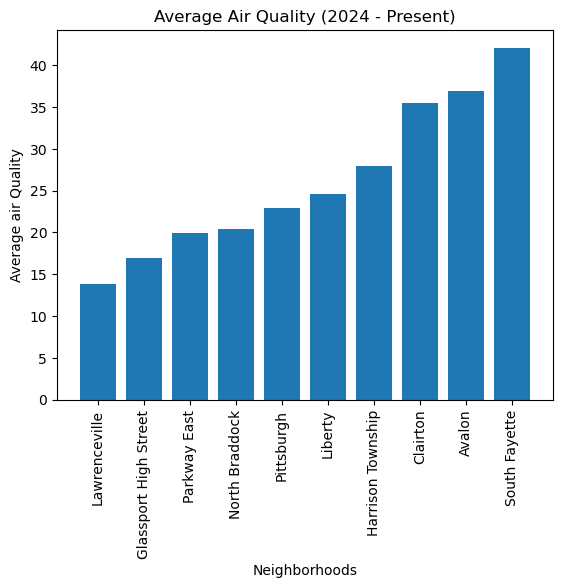

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

#Obtaining data from the dataset
air = pd.read_csv("Air_Quality.csv")

air['date'] = pd.to_datetime(air['date'])

# Combining neighborhoods with identical names
def clean_name(name):
    return re.sub(r'\s*\d+$','',str(name)).strip()
air['clean_name'] = air['site'].apply(clean_name)

#Pulling data from 2024 onwards
air_2024 = air[air['date'].dt.year >= 2024]

#Averaging air quality
average_nb_air = air_2024.groupby('clean_name')['index_value'].mean().sort_values()

#Plotting the data
plt.bar(average_nb_air.index, average_nb_air.values)
plt.xticks(rotation = 90)
plt.xlabel('Neighborhoods')
plt.ylabel('Average air Quality')
plt.title('Average Air Quality (2024 - Present)')
plt.show()